<a href="https://colab.research.google.com/github/agrim1989/DataScience-2024/blob/main/ecommerce_product_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import the required libraries**

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install scipy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/agrim1989/DataScience-2024/main/ecommerce_product_dataset.csv')
df.head()

NameError: name 'pd' is not defined

# Module 2: Data Wrangling


#### Checking for NAN or Null values in dataset

In [ ]:
df.isna().sum()

ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
dtype: int64

#### Describing datatypes in dataset

In [ ]:
df.describe()
#df.describe(include='all')

,ProductID,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
mean,500.500000,253.77551,3.025600,2498.753000,495.395000,0.251640,1011.037000,2023-12-08 16:06:14.400000
min,1.000000,10.11000,1.000000,3.000000,0.000000,0.000000,0.000000,2023-06-12 00:00:00
25%,250.750000,133.09250,2.100000,1201.750000,241.750000,0.130000,502.000000,2023-09-07 00:00:00
50%,500.500000,251.31000,3.100000,2476.000000,505.000000,0.250000,998.000000,2023-12-03 12:00:00
75%,750.250000,375.82750,4.000000,3797.500000,743.500000,0.380000,1540.000000,2024-03-07 00:00:00
max,1000.000000,499.74000,5.000000,4994.000000,993.000000,0.500000,1997.000000,2024-06-09 00:00:00
std,288.819436,141.40362,1.151004,1463.241871,292.799253,0.146455,582.113466,NaN


#### Listing all datatypes of DF

In [ ]:
df.dtypes

ProductID          int64
ProductName       object
Category          object
Price            float64
Rating           float64
NumReviews         int64
StockQuantity      int64
Discount         float64
Sales              int64
DateAdded         object
dtype: object

#### Converting Productnae to String, Category to String and DateAdded to Datetime

In [ ]:
df["ProductName"] = df["ProductName"].astype("str")
df["Category"] = df["Category"].astype("str")
df["DateAdded"] = df["DateAdded"].astype("datetime64[ns]")
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08


#### Listing all distinct product names

In [ ]:
df['ProductName'].value_counts().to_frame(name="Products")

,Products
ProductName,
Biography,22
Mountain Bike,19
Throw Blanket,18
Denim Jacket,17
Vitamin D,15
...,...
Rain Jacket,5
Winter Coat,5
Cuticle Oil,5


# Module 3: Exploratory Data Analysis


#### Counting number of products by name

In [ ]:
new_df = df[['Category', 'StockQuantity']]
# new_df.groupby(["Category"]).sum().sort_values(by='StockQuantity', ascending=False)
new_df.groupby(["Category"]).sum()

,StockQuantity
Category,
Art and crafting materials,18578
Bath and body,19099
Bedsheets,20096
Bicycles,19340
Blankets,17357
Books,23279
Candles,22308
Clothing,18069
Coats and jackets,19432


<BarContainer object of 1000 artists>

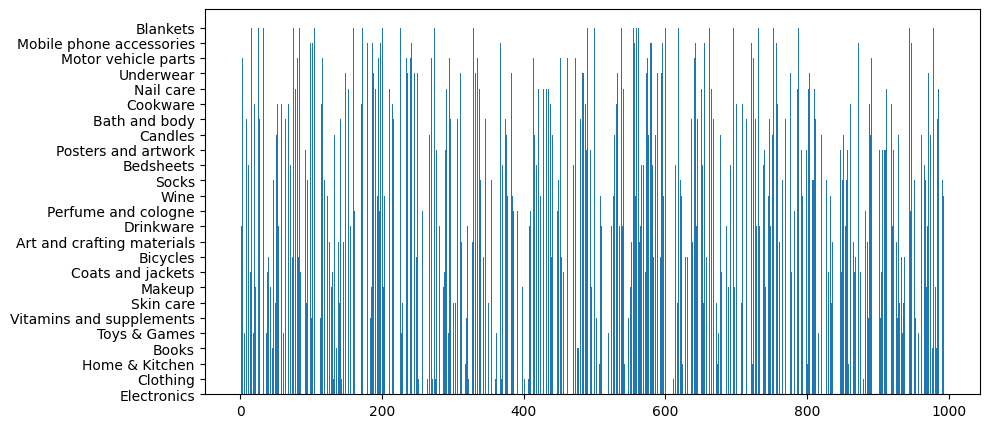

In [ ]:
x = new_df['Category']
y = new_df['StockQuantity']
plt.figure(figsize=(10, 5))
plt.bar(y, x, )

#### Boxplot for Category and Stock quantity

<Axes: xlabel='StockQuantity', ylabel='Category'>

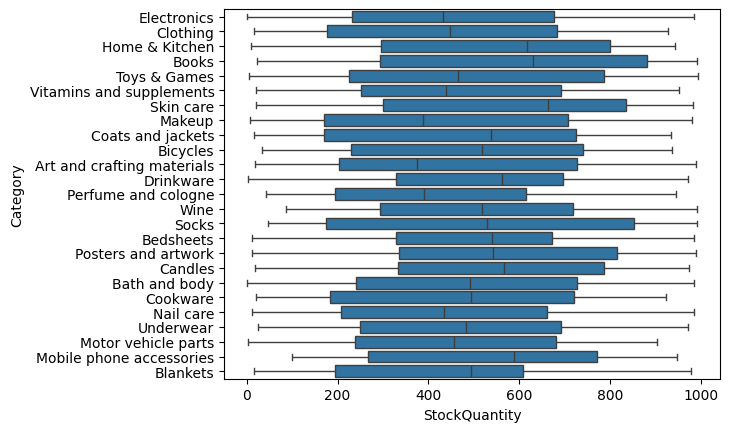

In [ ]:
sns.boxplot(x="StockQuantity", y="Category", data=new_df)

#### Regression Plot Price and Discount

<Axes: xlabel='Price', ylabel='Discount'>

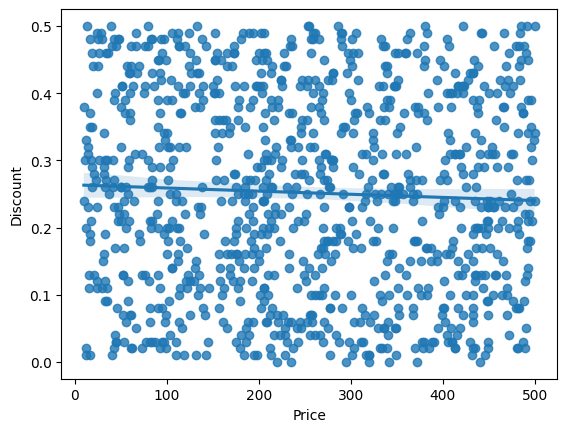

In [ ]:
sns.regplot(x="Price", y="Discount", data=df)

#### Correlation of Price with category

Corr should have all the fields as int or float

In [ ]:
new_df1 = df[["Price", "Discount"]]
new_df1.corr()["Price"].sort_values()


Discount   -0.045133
Price       1.000000
Name: Price, dtype: float64

# Module 4: Model Development


In [ ]:
x = df[["Discount"]]
y = df["Price"]
lm = LinearRegression()
lm.fit(x, y)
lm.score(x, y)

0.0020370068711229594

In [ ]:
from sklearn.model_selection import train_test_split


#### Train and test split for Discount and Price

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

In [ ]:
pipe = Pipeline([("scaler", StandardScaler()), ("polynomial", PolynomialFeatures(include_bias=False)), ("model", LinearRegression())])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

-0.0007447128356230515

In [ ]:
features = ["Discount", "Rating","NumReviews","StockQuantity","Sales"	]
lm = LinearRegression()

for fet in features:
    x = df[[fet]]
    y = df["Price"]
    lm.fit(x, y)
    lm.score(x, y)
    print(fet, lm.score(x, y))

Discount 0.0020370068711229594
Rating 4.175990499843962e-05
NumReviews 0.00016337807657285097
StockQuantity 4.107909485961958e-05
Sales 0.0008454170455718391


### Test and train data split by Features

In [ ]:
x = df[["Discount", "Rating","NumReviews","StockQuantity","Sales"	]]
y = df["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)
print("number of tainning  sample", x_train.shape)
print("number of test sample", x_test.shape)

number of tainning  sample (850, 5)
number of test sample (150, 5)


#### Create and fit a Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


In [ ]:
#Enter Your Code, Execute and take the Screenshot
rg = Ridge(alpha=0.1)
rg.fit(x_train, y_train)
y_pred = rg.predict(x_test)
r2_score(y_test, y_pred)

-0.016188038890733614

####  second order polynomial transform on both the training data and testing data

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_transformed = poly.fit_transform(x_train)
X_test_transformed = poly.transform(x_test)  # Use the fitted transformer
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_transformed, y_train)
y_pred = ridge_model.predict(X_test_transformed)
r2_score(y_test, y_pred)

c:\Users\GUR55373\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.61122e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


-0.030430446554268187